# California august temperature anomaly

*How anomalous was the August 2020 average temperature?*

![California Temperature August 2020](../../graphs/California_anomaly.png)


In this first section, we load required packages and modules

In [1]:
##This is so variables get printed within jupyter
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

In [2]:
##import packages
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import matplotlib.ticker as mticker

#for rank calculation
# import bottleneck

In [3]:
os.chdir(os.path.abspath('../../'))

## Load ERA5

We have retrieve netcdf files of global monthly 2m temperature and 2m dewpoint temperature for each year over 1979-2020. 

We load all files with xarray `open_mfdataset`. 

In [4]:
ERA5 = xr.open_mfdataset('E:/PhD/California_example/ERA5/ERA5_????.nc',combine='by_coords') ## open the data
ERA5# 

<xarray.Dataset>
Dimensions:    (latitude: 51, longitude: 61, time: 42)
Coordinates:
  * longitude  (longitude) float32 -130.0 -129.0 -128.0 ... -72.0 -71.0 -70.0
  * latitude   (latitude) float32 70.0 69.0 68.0 67.0 ... 23.0 22.0 21.0 20.0
  * time       (time) datetime64[ns] 1979-08-01 1980-08-01 ... 2020-08-01
Data variables:
    t2m        (time, latitude, longitude) float32 dask.array<chunksize=(1, 51, 61), meta=np.ndarray>
    d2m        (time, latitude, longitude) float32 dask.array<chunksize=(1, 51, 61), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2020-10-01 23:23:34 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

## Calculating the anomaly

We want to show how anomalous the recorded monthly average temperature for 2020 is compared to the 1979-2010 average. 


In [13]:
ERA5_anomaly = ERA5['t2m'] - ERA5['t2m'].sel(time=slice('1979','2010')).mean('time')
ERA5_anomaly.attrs = {
    'long_name': 'August temperature anomaly',
    'units': 'C'
}
ERA5_sd_anomaly = ERA5_anomaly / ERA5['t2m'].std('time')
ERA5_sd_anomaly.attrs = {
    'long_name': 'August temperature standardized anomaly',
    'units': '-'
}

## Plotting

We define a function to plot the data on a global map:

In [14]:
def plot_California(ERA5_input):

    extent = [-120, -80, 20, 50]
    central_lon = np.mean(extent[:2])
    central_lat = np.mean(extent[2:])

    plt.figure(figsize=(12, 6))
    ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
    ax.set_extent(extent)

    ERA5_input.plot(
        ax=ax,
        transform=ccrs.PlateCarree(),
    #     levels=[1, 2, 3, 4, 5],
        extend='both')#,
    #     colors=plt.cm.Reds_r)

    ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
    ax.coastlines(
        resolution='110m')  #Currently can be one of “110m”, “50m”, and “10m”.
    ax.set_title('') 
    gl = ax.gridlines(crs=ccrs.PlateCarree(),
                      draw_labels=True,
                      linewidth=1,
                      color='gray',
                      alpha=0.5,
                      linestyle='--')
    gl.top_labels = False
    gl.right_labels = False

Temperature anomaly

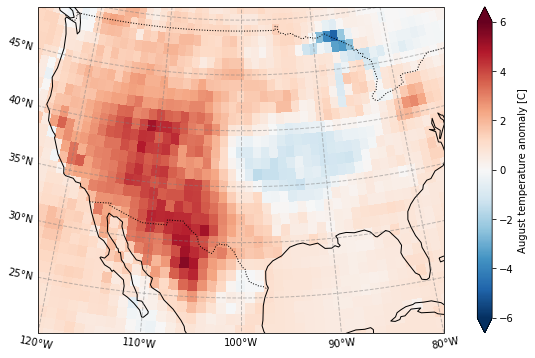

In [15]:
plot_California(ERA5_anomaly.sel(time = '2020'))
plt.savefig('graphs/California_anomaly.png')

Plot the standardized anomaly

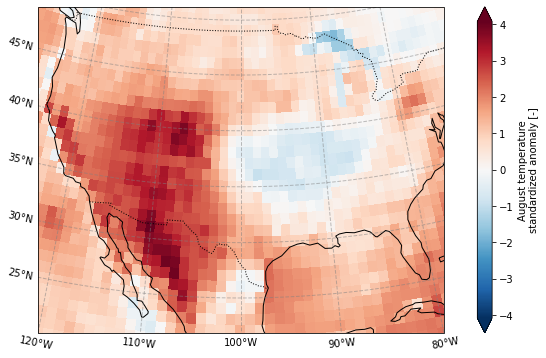

In [16]:
plot_California(ERA5_sd_anomaly.sel(time = '2020'))
plt.savefig('graphs/California_sd_anomaly.png')

Define mask as higher than 2 standard deviation anomaly

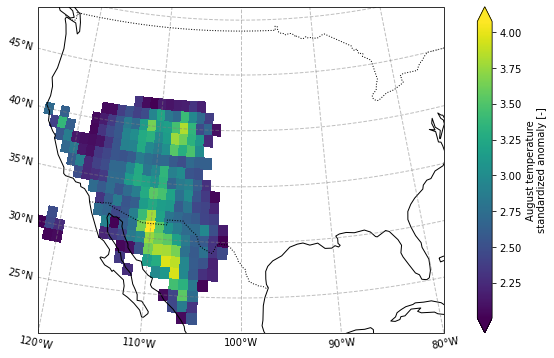

In [17]:
ERA5_masked = (ERA5_sd_anomaly.
               sel(longitude = slice(-125,-100),
                  latitude = slice(45,20)).
               where(ERA5_sd_anomaly.sel(time = '2020').
                     squeeze('time')>2)
              )

# ERA5_masked
plot_California(ERA5_masked.sel(time = '2020'))

Text(0, 0.5, 'August temperature anomaly (C)')

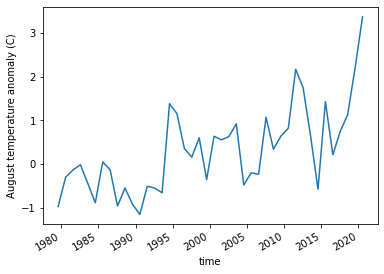

In [21]:
ERA5_anomaly_timeseries = ERA5_anomaly.sel(longitude = slice(-119,-100)).where(ERA5_sd_anomaly.sel(time = '2020').squeeze('time')>2).mean(['longitude','latitude'])
ERA5_anomaly_timeseries.plot()
plt.ylabel('August temperature anomaly (C)')
plt.savefig('graphs/California_anomaly_timeseries.png')